# Slice sampling

## 1. introduction（why do we need slice sampling?）

MH algorithm and Gibbs sampling are fundation of MCMC algorithm. These two algorithm are widely used for inference problems, but they are belong to **random walk** sampling algorithms and they are very sensitive to the step size of proposal distribution.

**Random walk** means that the next state is predicted based on current state, and this process is essentially random walk.  What's the limitation of random walk algorithm:

   1. overshoot and oscillate at pintches
   2. very sensitive to the step size: large step size leads to lots of rejected samples, and small step size will take a lot of time to travel the whole "distribution". Soemtimes, to specifies the step size is hard because the detail balance puts a constraint preventing any proposal width scale parameters from being set based on past iterations of the current chain.
   3. In very high dimension, MH algorithm is very inefficient due to random walk.
   4. MH cannot travel a long distance between isolate local minimum.
   5. large correlation.

## 2. What's the splice sampling?

- Pick an initial point x0x0 from our posterior
- Draw y0y0 from U(0, f(x0x0))
- Repeat for N samples
 - Select the interval (e.g. stepping out, etc)
 - Sample xixi from that interval (e.g. shrinkage)
 - Draw yiyi from U(0, f(xixi))

### 2.1 The univariate case

1. Initially, randomly selecting $x^{(k)}$ when $k=0$.
2. Draw $y^{(k)}$ from $U(0, f(x^{(k)}))$.
3. Find an interval $I=(L, R)$ around $x^{k}$ corresponding to $S=x,s.t. f(x)>y^{(k)}$
4. Draw $x^{(k+1)}$ from $U(I)$.
5. Repeat step (2). 

Note, $S$ is the perfect region and $I$ is the interval we choose to corrsepond to this.

In [8]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline



mu1 = 3; mu2=10; sigma1=1; sigma2=2; l1=.0; l2=1.0;

normal = 1./np.sqrt(2*np.pi*sigma2**2)
fun = lambda x: l1*norm.pdf(x, mu1, sigma1) + l2*norm.pdf(x, mu2, sigma2)
invfunR = lambda y: np.sqrt(-2*sigma2**2*np.log(y/normal))+mu2
invfunL = lambda y: -np.sqrt(-2*sigma2**2*np.log(y/normal))+mu2

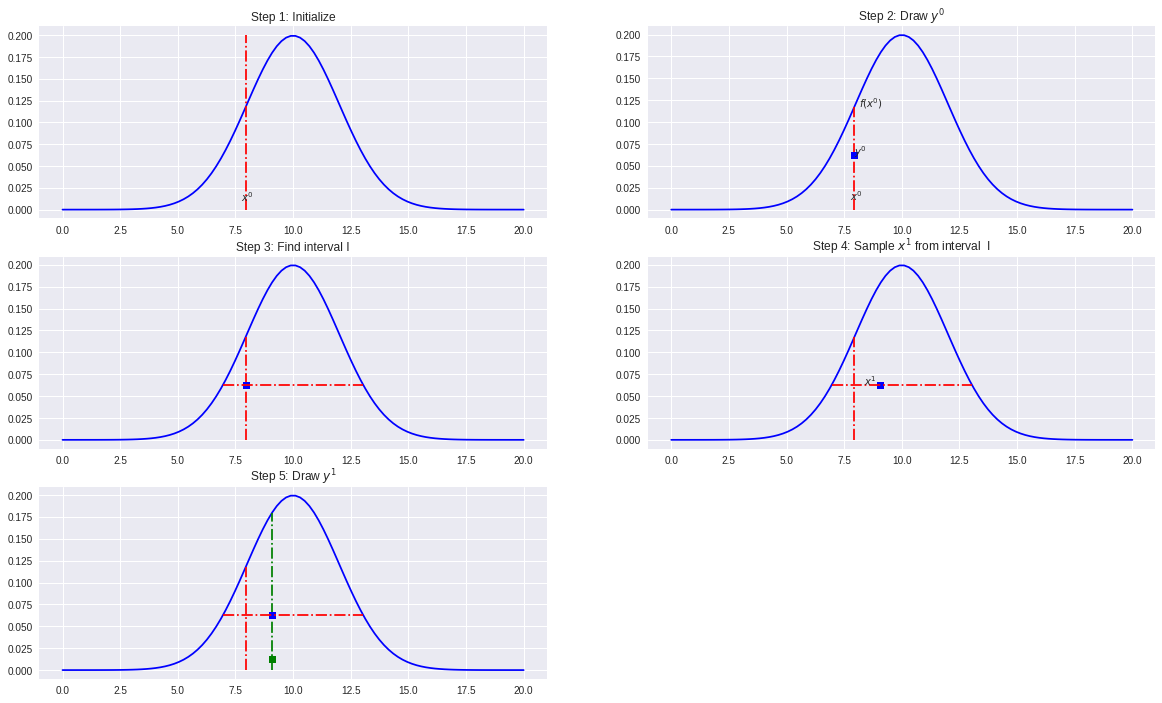

In [9]:
x = np.linspace(0,20, 100)

plt.figure(figsize=[20,12])

plt.subplot(3,2,1)
plt.plot(x, fun(x), 'b')

np.random.seed(17)
x0=np.random.uniform(low=5, high=15, size=1)
plt.plot( [x0 ,x0], [0, 0.2], 'r-.')
plt.title('Step 1: Initialize')
plt.annotate( '$x^{0}$', [x0-0.2,.01], xytext=None, xycoords='data',
         textcoords='data', arrowprops=None)


plt.subplot(3,2,2)
plt.plot(x, fun(x), 'b')

plt.annotate( '$x^{0}$', [x0-0.2,.01], xytext=None, xycoords='data',
         textcoords='data', arrowprops=None)
plt.annotate( '$f(x^0)$', [x0+0.2, fun(x0)], xytext=None, xycoords='data',
         textcoords='data', arrowprops=None)



plt.plot( [x0 ,x0], [0, fun(x0)], 'r-.')
plt.title('Step 2: Draw $y^{0}$')
y0=np.random.uniform(low=0, high=fun(x0), size=1)
plt.plot( [x0,x0], [y0, y0], 'bs')

plt.annotate( '$y^{0}$', [x0,y0], xytext=None, xycoords='data',
         textcoords='data', arrowprops=None)

plt.subplot(3,2,3)
plt.plot(x, fun(x), 'b')
plt.plot( [x0 ,x0], [0, fun(x0)], 'r-.')
plt.plot( [x0,x0], [y0, y0], 'bs')


plt.plot( [invfunL(y0), invfunR(y0)] , [y0, y0], 'r-.')
#plt.plot( [2,4] , [y0, y0], 'r-.')
plt.title('Step 3: Find interval I') 

plt.subplot(3,2,4)
plt.plot(x, fun(x), 'b')
plt.plot( [x0 ,x0], [0, fun(x0)], 'r-.')

x1=np.random.uniform(low=8.5, high=11.5, size=1)
plt.plot( [x1,x1], [y0, y0], 'bs')
plt.plot( [invfunL(y0), invfunR(y0)] , [y0, y0], 'r-.')
#plt.plot( [2,4] , [y0, y0], 'r-.')
plt.title('Step 4: Sample $x^{1}$ from interval  I') 
plt.annotate( '$x^{1}$', [x1-0.7,y0], xytext=None, xycoords='data',
         textcoords='data', arrowprops=None)


plt.subplot(3,2,5)
plt.plot(x, fun(x), 'b')
plt.plot( [x0 ,x0], [0, fun(x0)], 'r-.')
plt.plot( [x1 ,x1], [0, fun(x1)], 'g-.')
y1=np.random.uniform(low=0, high=fun(x1), size=1)

plt.plot( [x1,x1], [y0, y0], 'bs')
plt.plot( [x1,x1], [y1, y1], 'gs')
plt.plot( [invfunL(y0), invfunR(y0)] , [y0, y0], 'r-.')
#plt.plot( [2,4] , [y0, y0], 'r-.')
plt.title('Step 5: Draw $y^1$') 
#plt.annotate( '$x^{1}$', [9.5,y0], xytext=None, xycoords='data',
#         textcoords='data', arrowprops=None)

### 2.2 The problem of the multimodal case

In [16]:
mu1=3; mu2=10; sigma1=1; sigma2=2; l1=.30; l2=.70;

normal = 1./np.sqrt(2*np.pi*sigma2**2)

fun=lambda x: l1*norm.pdf(x, mu1, sigma1)+l2*norm.pdf(x, mu2, sigma2)

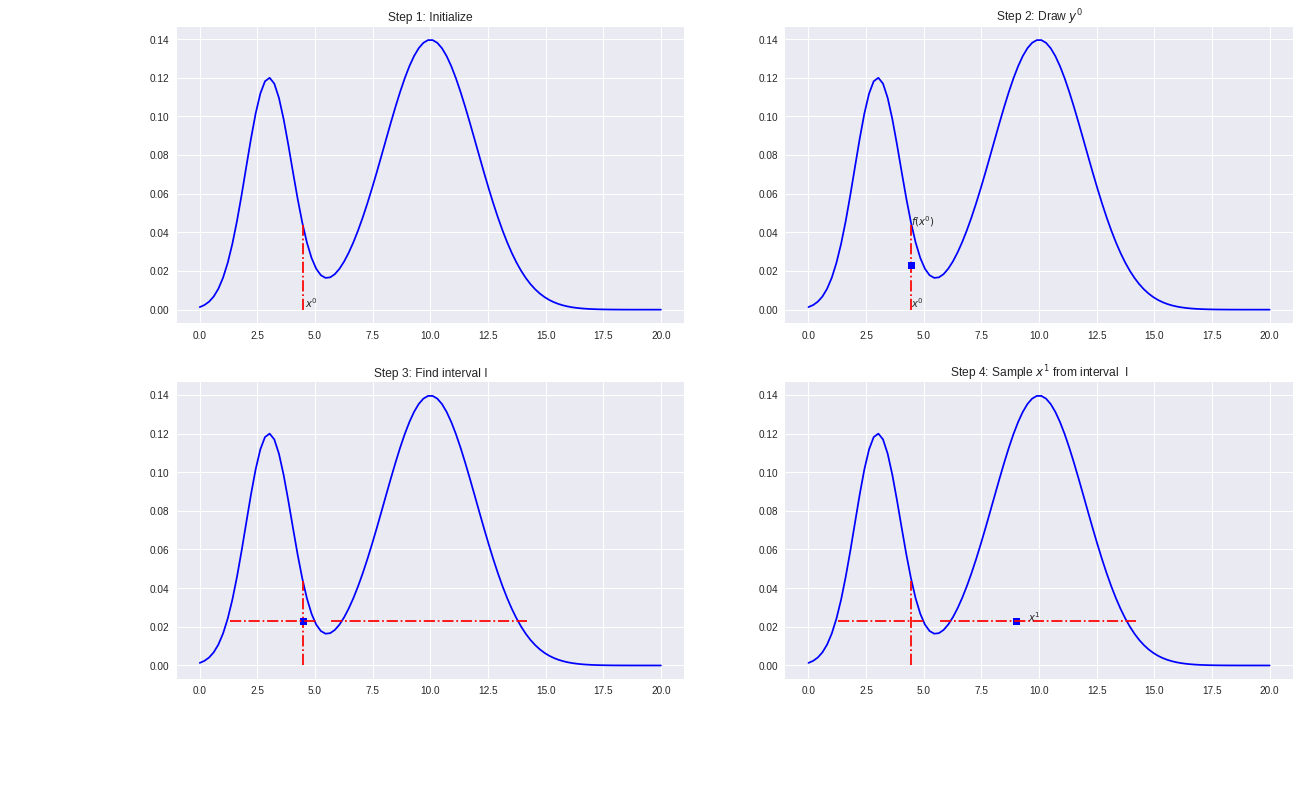

In [17]:
x = np.linspace(0,20, 100)

plt.figure(figsize=[20,12])

plt.subplot(2,2,1)
plt.plot(x, fun(x), 'b')

np.random.seed(16)
x0=np.random.uniform(low=0, high=20, size=1)
plt.plot( [x0 ,x0], [0, fun(x0)], 'r-.')
plt.title('Step 1: Initialize')
plt.annotate( '$x^{0}$', [x0+0.1,.001], xytext=None, xycoords='data',
         textcoords='data', arrowprops=None)


plt.subplot(2,2,2)
plt.plot(x, fun(x), 'b')

plt.annotate( '$x^{0}$', [x0,.001], xytext=None, xycoords='data',
         textcoords='data', arrowprops=None)
plt.annotate( '$f(x^0)$', [x0,fun(x0)], xytext=None, xycoords='data',
         textcoords='data', arrowprops=None)



plt.plot( [x0 ,x0], [0, fun(x0)], 'r-.')
plt.title('Step 2: Draw $y^{0}$')
y0=np.random.uniform(low=0, high=fun(x0), size=1)
plt.plot( [x0,x0], [y0, y0], 'bs')

plt.annotate( '$y^{0}$', [10.5,.15], xytext=None, xycoords='data',
         textcoords='data', arrowprops=None)

plt.subplot(2,2,3)
plt.plot(x, fun(x), 'b')
plt.plot( [x0 ,x0], [0, fun(x0)], 'r-.')
plt.plot( [x0,x0], [y0, y0], 'bs')
plt.plot( [5.7,14.2] , [y0, y0], 'r-.')
plt.plot( [1.3,5.1] , [y0, y0], 'r-.')
plt.title('Step 3: Find interval I') 

plt.subplot(2,2,4)
plt.plot(x, fun(x), 'b')
plt.plot( [x0 ,x0], [0, fun(x0)], 'r-.')
plt.plot( [9,9], [y0, y0], 'bs')
plt.plot( [5.7,14.2] , [y0, y0], 'r-.')
plt.plot( [1.3,5.1] , [y0, y0], 'r-.')
plt.title('Step 4: Sample $x^{1}$ from interval  I') 
plt.annotate( '$x^{1}$', [9.5,y0], xytext=None, xycoords='data',
         textcoords='data', arrowprops=None)

## 3 Stepping out algorithm

"step out" is procedure to determine the proposed interval.

The idea behind stepping out is that you expand your interval by fixed widths ww until your endpoints are outside of S. The full algorithm is as follows:

- Set w = width of your interval expansions
- Draw u, v ~ Unif(0,1)
- set $L = x(0)−wu$,$R=L+w$ (so $x^{(0)}$ lies in $[L, R]$ )
- while $y < f(L)$ (here’s where we extend left interval)
  - L = L - w
- while $y < f(R)$ ( here’s where we extend the right interval)
  - R = R + w

The final interval will be larger than S. We will later see how we accept/reject to ensure our samples are from within S.

In [18]:
import time
def plot_bounds(k, kmax, L, R, y, ts=1):
    if k <= kmax:
        plt.plot( [L,R], [y, y], 'r', marker=".", linestyle='None')
        plt.annotate("{}".format(k), xy=(L,y))
        plt.annotate("{}".format(k), xy=(R,y))
        #time.sleep(ts)
def plot_yline(k, kmax, xprev, y, f, ts
               =1):
    if k <= kmax:
        plt.plot( [x_prev ,x_prev], [0, f(x_prev)], 'r-', lw=1)
        plt.plot( [x_prev,x_prev], [y, y], 'rd', alpha=0.2)
        plt.annotate("{}".format(k), xy=(x_prev,y))
        #time.sleep(ts)
def plot_prop(k, kmax, x_prop, y, accept=None, ts=1):
    if accept=="y":
        symbol="ro"
        alpha=0.3
    elif accept=="n":
        symbol="ko"
        alpha=0.1
    else:
        symbol="bs"
        alpha=0.5
    if k <= kmax:
        plt.plot( [x_prop, x_prop], [y, y], symbol, alpha=alpha)
        plt.annotate("{}".format(k), xy=(x_prop,y))
        #time.sleep(ts)

('L,R, xprop', 0.0011959265323060464, 16.001195926532304, 3.570490993592926)
('L,R, xprop', 1.4067595685920269, 4.406759568592027, 1.6177341690085278)


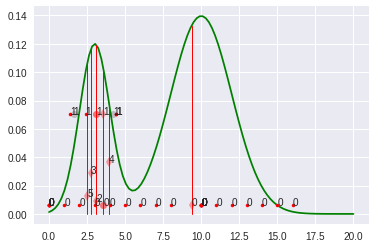

In [19]:
w=1.0
x = np.linspace(0,20, 100)
L=0; R=0;
x_prev = np.random.uniform(low=0, high=17)
fig = plt.figure()
iters=10000
trace=[]
kmax=1
plt.plot(x, fun(x),'g')
for k in range(iters):
    y_samp = np.random.uniform(low=0, high=fun(x_prev))
    plot_yline(k, 5, x_prev, y_samp, fun)
    # widen left
    U = np.random.rand()
    L=x_prev-U*w
    R=x_prev+w*(1.0-U)
    while fun(L)>y_samp:
        L = L-w
        plot_bounds(k, kmax, L, R, y_samp)
    while fun(R)>y_samp:
        R = R+w
        plot_bounds(k, kmax, L, R, y_samp)
    #now propose new x on L,R
    
    x_prop= np.random.uniform(low=L, high=R)
    if k <= kmax:
        print("L,R, xprop", L, R, x_prop)
    #now accept if kosher, ie if function at new x is higher than the y we sampled at prev x
    #plot_prop(k, kmax, x_prop, y_samp, accept=None)
    accept=False
    while accept==False:
        if y_samp < fun(x_prop):
            x_prev = x_prop
            trace.append(x_prop)
            plot_prop(k, kmax, x_prop, y_samp, accept='y')
            accept = True
        else: #propose again: in real slice we would shrink
            plot_prop(k, kmax, x_prop, y_samp, accept='n')
            x_prop= np.random.uniform(low=L, high=R)
        

plt.show()

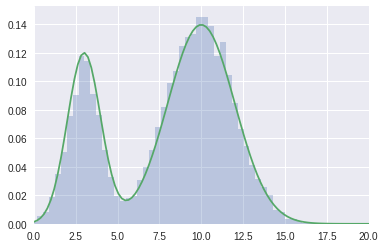

In [20]:
plt.hist(trace, bins=50, alpha=0.3, normed=True);
#sns.kdeplot(xsmp)
plt.xlim( [0,20])
plt.plot(x, fun(x))

## 4. Shinkage  algorithm

Shinkage algorithm is a methods to sample from the univariate window.

The idea behind the shrinkage procedure is that you sample from your interval, if the sample’s not in SS, make that point the new endpoint of your interval decreasing the length of your interval. Otherwise keep the sample and go back to the interval selection problem.

The procedure of Shinkage algorithm:

- Start with interval $I=(L,R)$.
- Current sample is $x^{(k)}$ and $y^{(k)}$.
- repeat until loop exits
    - sample $x^{(*)}$ uniformly from $[L, R]$.
    - if $y^{(k)}< f(x^{(*)})$:
        - accept $x^{(*)}$ and end loop
    - else
        - if $x^{(*)} < x^{(k)}$, $L=x^{(*)}$.
        - if $x^{(*)} > x^{(k)}$, $R=x^{(*)}$

('L,R, xprop', -0.14520202657522896, 16.854797973424773, 0.13398249620390573)
('L,R, xprop', -0.25212090218218947, 16.74787909781781, 16.63458949919975)
('L,R, xprop', -0.25212090218218947, 16.63458949919975, 14.15109077859609)


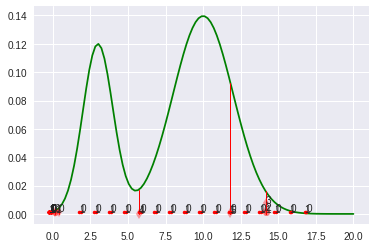

In [21]:
w=1.0
x = np.linspace(0,20, 100)
L=0; R=0;
x_prev = np.random.uniform(low=0, high=17)
fig = plt.figure()
iters=10000
trace=[]
kmax=1
plt.plot(x, fun(x),'g')
for k in range(iters):
    y_samp = np.random.uniform(low=0, high=fun(x_prev))
    plot_yline(k, 5, x_prev, y_samp, fun)
    # widen left
    U = np.random.rand()
    L=x_prev-U*w
    R=x_prev+w*(1.0-U)
    while fun(L)>y_samp:
        L = L-w
        plot_bounds(k, kmax, L, R, y_samp)
    while fun(R)>y_samp:
        R = R+w
        plot_bounds(k, kmax, L, R, y_samp)
    #now propose new x on L,R
    
    while 1:
        x_prop= np.random.uniform(low=L, high=R)
        if k <= kmax:
            print("L,R, xprop", L, R, x_prop)
        if y_samp < fun(x_prop):
            x_prev = x_prop
            trace.append(x_prop)
            plot_prop(k, kmax, x_prop, y_samp, accept='y')
            break
        elif x_prop > x_prev:
                R = x_prop
        elif x_prop < x_prev:
                L = x_prop

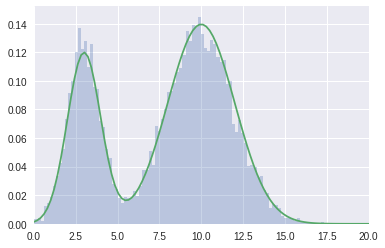

In [22]:
plt.hist(trace, bins=100, alpha=0.3, normed=True);
#sns.kdeplot(xsmp)
plt.xlim( [0,20])
plt.plot(x, fun(x))

## 5. Why does slice sampling work?(detail balance)

![das](https://raw.githubusercontent.com/Gwan-Siu/BlogCode/master/Monte%20Carol%20Method/09BA4C11-38BC-49A5-9CBB-72861BC5CB5A.png)

# Reference

In [ ]:
1. 